In [12]:
(1!=1)&(1!=3)

False

In [1]:
if((1!=2))

1

#### decision tree
https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

#### 용어
full tree :  모든 terminal node(끝 노드)의 순도가 100%인 상태

#### Entropy
$Entropy(A) = -\sum^{m}_{k=1} p_k log_2(p_k)$ : 빨간색공 10개, 파란색공 6개일때  $p_1=\frac{10}{16}, p2=\frac{6}{16}$<br>
(7,1),(3,5)로 분류했다면 $Entropy(A) = \sum^{d}_{i=1}R_i(-\sum^{m}_{k=1}p_k log_2(p_k) (단 R_i = 1/n)$<br>
ex)  주택 분류 1,23

#### Gini Index
$G.I(A) = \sum^{d}_{i=1}(R_i(1-\sum^{m}_{k=1}p^2_{ik}))$

#### 모델 학습
1. 재귀적 분기(recursive partitioning)<br>
개체 : n개, 변수 : d 개이면 1회 분기 시 d(n-1) 회 시행
2. 가지치기(pruning)
full tree 는 과적합 상태이기 때문에 어느정도 결합필요

#### cost function
decision tree 는 cost function 을 최소로 하는 분기를 찾아내도록 학습
$CC(T) = Err(T) + \alpha \times L(T)$<br>
$CC(T)$ : decision tree 의 비용 복잡도(오류가 적으면서 terminal node 수가 적은 단순한 모델일수록 작은 값)<br>
$Err(T)$ : 검증데이터에 대한 오분류율<br>
$L(T)$ : terminal node 의 수<br>
$\alpha$ : 보통 0.01~0.1


In [1]:
import pandas as pd
import numpy as np

In [104]:
### sklearn algorithm example
#https://www.kaggle.com/perry15/decisiontree-example/data

In [105]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
#feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
feature_cols = dataset.columns.tolist()[:-1]
x = dataset[feature_cols] # features
y = dataset.Outcome # classes

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [107]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc = dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7186147186147186


/home/edward/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


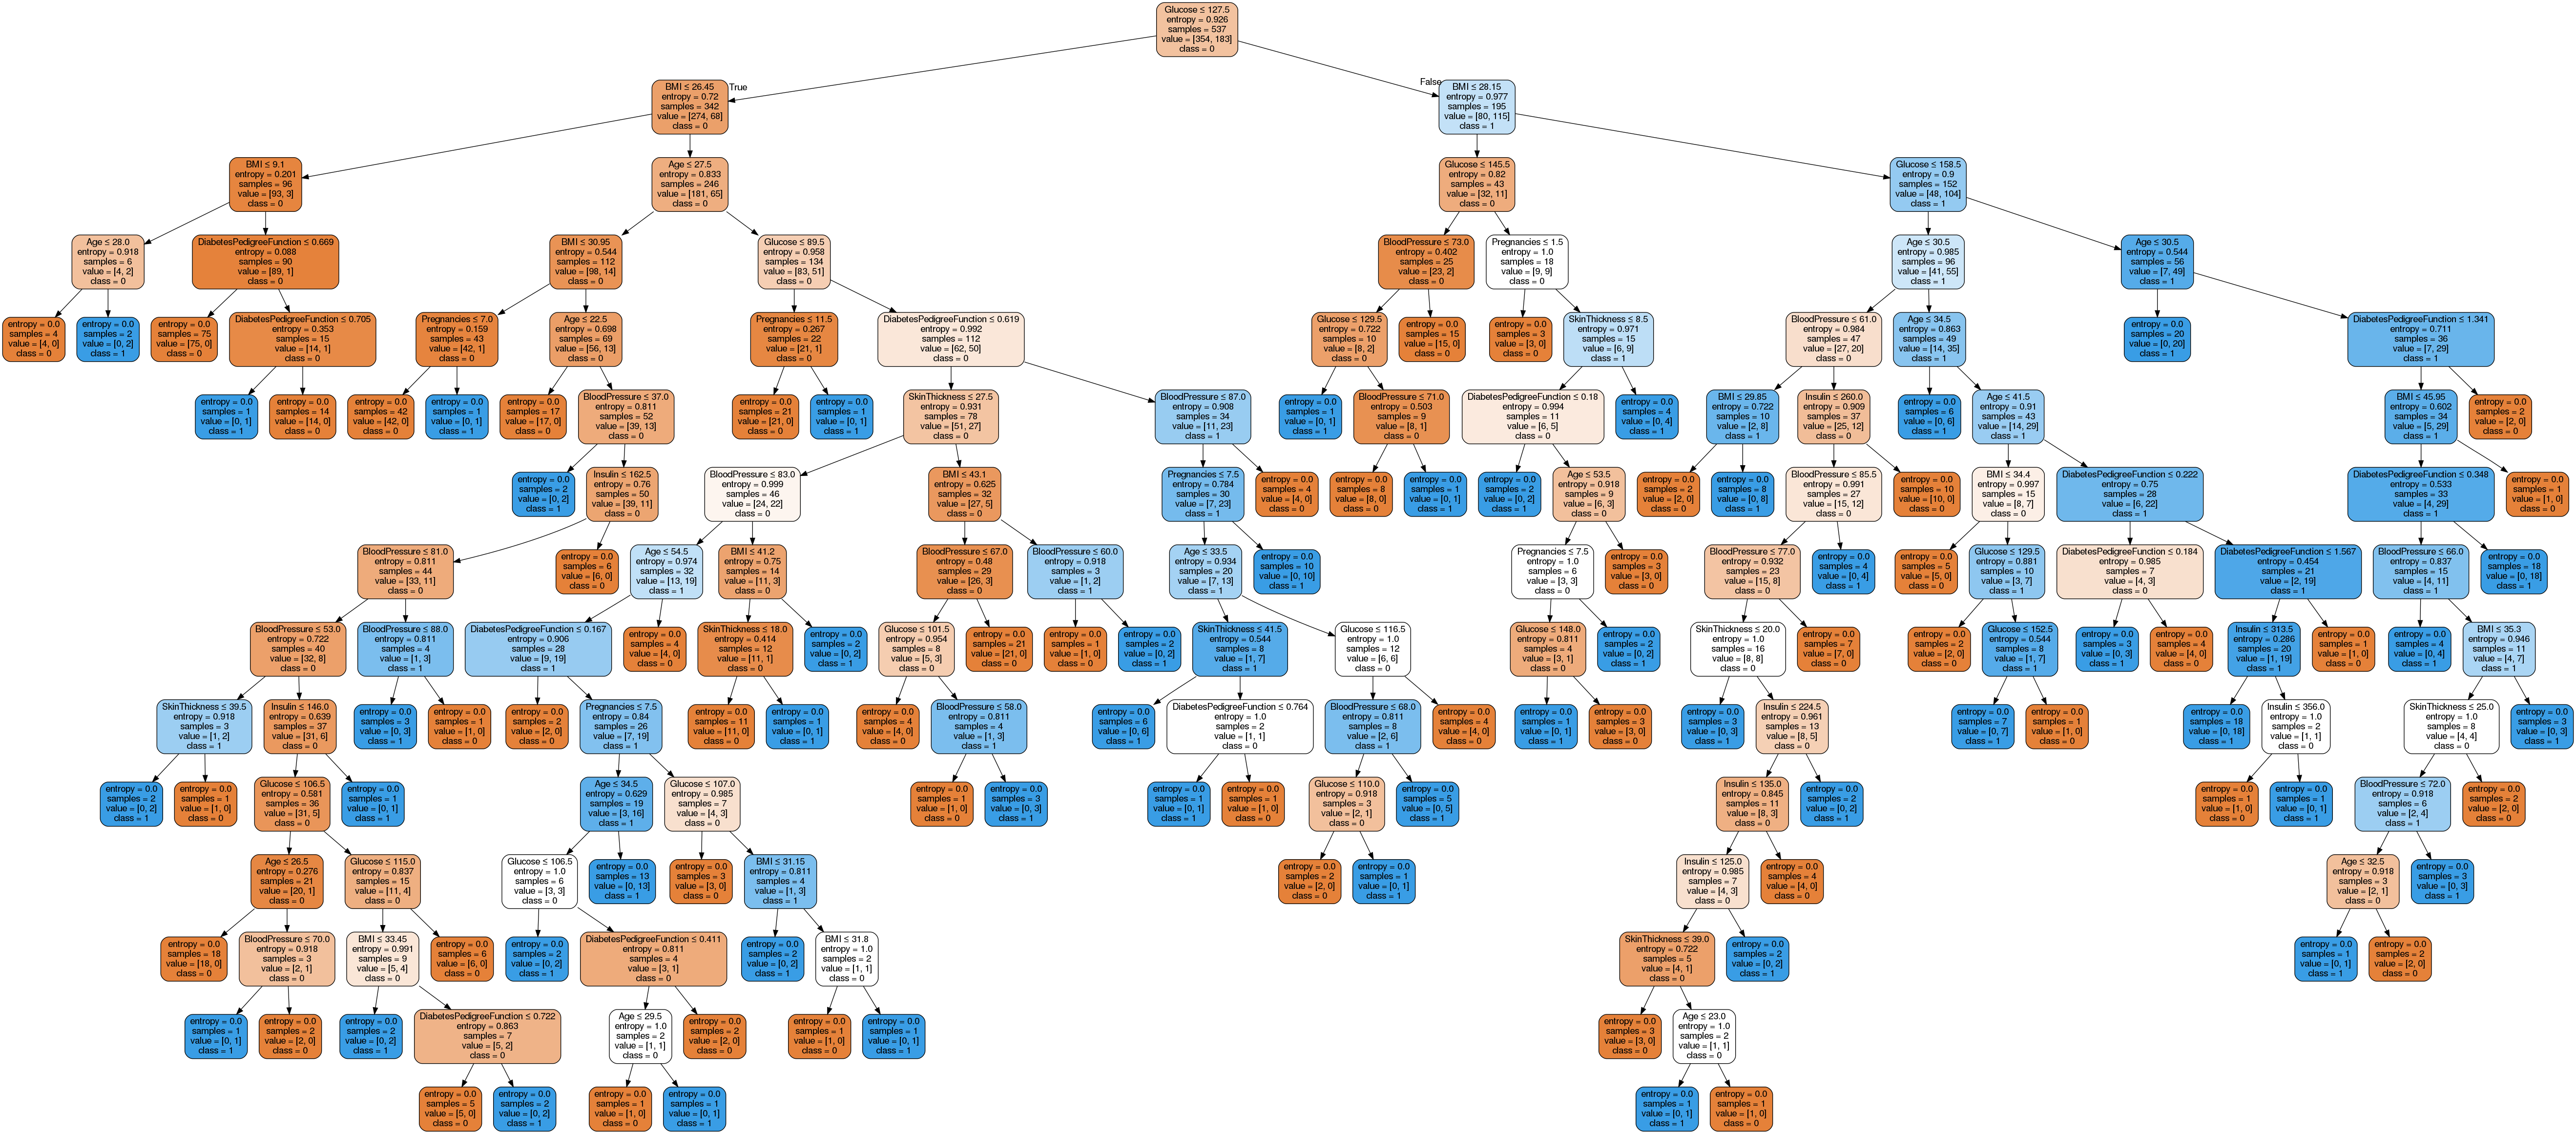

In [108]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [113]:
#setting max deapth is pre-pruning
dtc_optimized = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc_optimized = dtc_optimized.fit(x_train,y_train)
y_pred = dtc_optimized.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


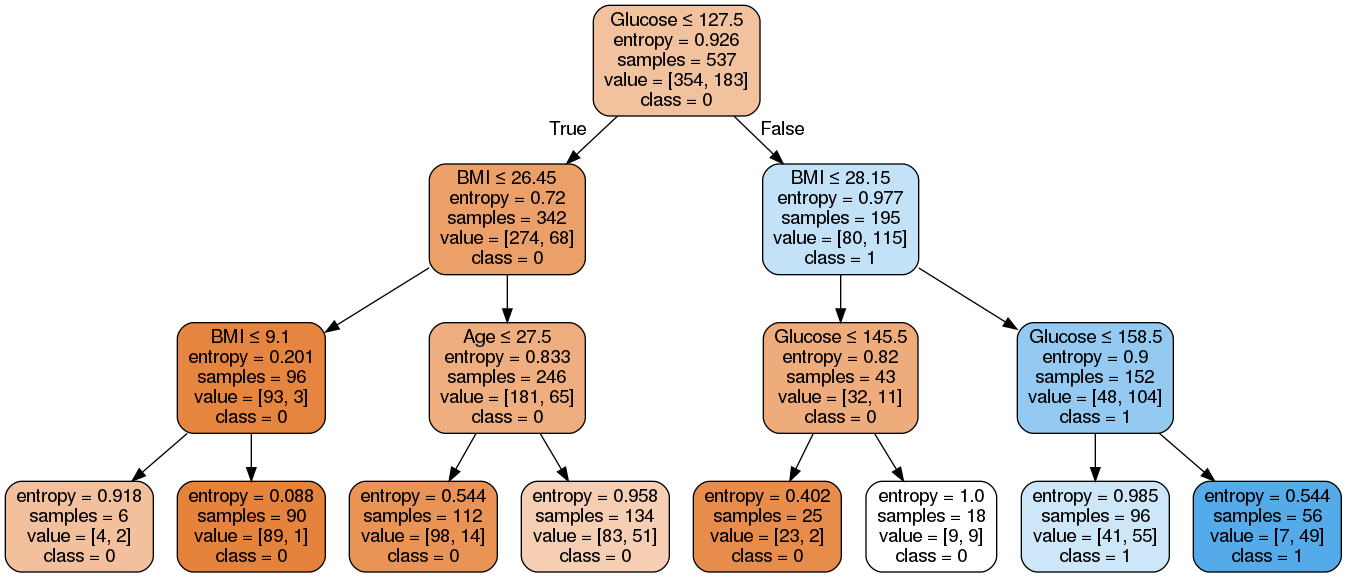

In [114]:
dot_data = StringIO()
export_graphviz(dtc_optimized, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [121]:
entropy([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0])

0.3227569588973982

In [ ]:
#me

#### 과정
1. 엔트로피함수
2. column 따라 Y값 분할 - input(column name), return(분할된 data frame)
3. 재귀적으로 반복, entropy 0까지, column과 value는 list에 쌓음, 이때 trueFalse아니면?

In [2]:
inputs = [
    ({'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'no'}, False),
    ({'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'yes'}, False),
    ({'level': 'Mid', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'R', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'R', 'tweets': 'yes', 'phd': 'yes'}, False),
    ({'level': 'Mid', 'lang': 'R', 'tweets': 'yes', 'phd': 'yes'}, True),
    ({'level': 'Senior', 'lang': 'Python', 'tweets': 'no', 'phd': 'no'}, False),
    ({'level': 'Senior', 'lang': 'R', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Senior', 'lang': 'Python', 'tweets': 'yes', 'phd': 'yes'}, True),
    ({'level': 'Mid', 'lang': 'Python', 'tweets': 'no', 'phd': 'yes'}, True),
    ({'level': 'Mid', 'lang': 'Java', 'tweets': 'yes', 'phd': 'no'}, True),
    ({'level': 'Junior', 'lang': 'Python', 'tweets': 'no', 'phd': 'yes'}, False)
]

X = pd.DataFrame([x[0] for x in inputs])

Y = pd.DataFrame(x[1] for x in inputs)

Y.columns = ['value']

In [3]:
df = pd.concat([X,Y],axis=1)

arr = Y.value.values

In [4]:
def entropy(arr):
    if(len(arr)==0):
        return(0)
    
    p1 = sum(arr)/len(arr)
    p2 = (len(arr)-sum(arr))/len(arr)
    if((p1==0)|(p2==0)):
        return(0)
    
    result = -(p1*np.log2(p1) + p2*np.log2(p2))
    
    return(result)

In [5]:
def entropy_multi(arrs):
    entropy_value = 0
    n = sum([len(x) for x in arrs])
    for x in arrs:
        entropy_value += len(x)*entropy(x)/n
    return(entropy_value)

In [6]:
#tree
class Node:
    def __init__(self, df,col,row, entropy):
        self.df = df
        self.col = col
        self.row = row
        self.entropy = entropy
        self.left = None
        self.right = None

In [7]:
def splitDf(df):
    minimum=1
    colnames = df.columns
    for col in colnames[:-1]:

        for row in df[col].unique():
            ys = []
            ys = ys+[df[df[col]==row]['value'].values,df[df[col]!=row]['value'].values]
            if(entropy_multi(ys)<minimum):
                minimum = entropy_multi(ys)
                cr = [col,row]
    return(cr,minimum)

In [8]:
#input : node, df, ! arr(entropy), 
#output : entropy, cr, arr 

In [9]:
def getNodes(node, df):
    if(entropy(df['value'])==0):
        node.entropy = 0
        return 0
    cr = splitDf(df)[0]
    node.entropy = entropy(df['value'])
    dfLeft = df[df[cr[0]]==cr[1]]
    dfRight = df[df[cr[0]] != cr[1]]
    
    
    node.left = Node(dfLeft, cr[0], cr[1],None)
    node.right = Node(dfRight, cr[0], 'not '+cr[1],None)
    
    getNodes(node.left, dfLeft)
    getNodes(node.right, dfRight)

In [10]:
root = Node(df,None,None,None)

root.entropy = entropy(df['value'])

In [11]:
getNodes(root,df)

In [43]:
a=[1,2,3]
def temp(a):
    a[0]=10

In [44]:
temp(a)

In [45]:
a

[10, 2, 3]

In [49]:
def treePrint(node,treeList):
    treeList_ = treeList.copy()
    treeList_.append((node.col,node.row))
    if((node.left ==None)&(node.right ==None)):
        print(treeList_)
        return 0
    treePrint(node.left, treeList_)
    treePrint(node.right,treeList_)

In [51]:
treePrint(root,[])

[(None, None), ('level', 'Mid')]
[(None, None), ('level', 'not Mid'), ('tweets', 'no'), ('level', 'Senior')]
[(None, None), ('level', 'not Mid'), ('tweets', 'no'), ('level', 'not Senior'), ('phd', 'no')]
[(None, None), ('level', 'not Mid'), ('tweets', 'no'), ('level', 'not Senior'), ('phd', 'not no')]
[(None, None), ('level', 'not Mid'), ('tweets', 'not no'), ('phd', 'no')]
[(None, None), ('level', 'not Mid'), ('tweets', 'not no'), ('phd', 'not no'), ('level', 'Junior')]
[(None, None), ('level', 'not Mid'), ('tweets', 'not no'), ('phd', 'not no'), ('level', 'not Junior')]


In [70]:
def dtPred(node, df):

#     if(node.col==None):
#         dfLeft = df
#         dfRight = df
    if('not' in node.row):
        deleteNot = node.row[4:]
    else:
        deleteNot = node.row
    dfLeft = df[df[node.col]==deleteNot]
    
    dfRight = df[df[node.col]!=deleteNot]
    
    if((node.left ==None)&(node.right ==None)):
        print(dfRight)
        predDf.append(dfLeft)
        predDf.append(dfRight)
        return 0
    
    dtPred(node.left, dfLeft)
    dtPred(node.right, dfRight)
    

In [86]:
predDf = []

In [87]:
dtPred(root.right,df)

   level    lang tweets  phd  value
2    Mid  Python     no   no   True
11   Mid  Python     no  yes   True
Empty DataFrame
Columns: [level, lang, tweets, phd, value]
Index: []
  level lang tweets  phd  value
6   Mid    R    yes  yes   True
     level    lang tweets  phd  value
1   Senior    Java     no  yes  False
13  Junior  Python     no  yes  False
    level lang tweets phd  value
8  Senior    R    yes  no   True
     level    lang tweets  phd  value
10  Senior  Python    yes  yes   True


In [ ]:
def dtPred():
    

In [76]:
#left is true
root.left = Node(df_,cr[0],cr[1])
root.right = Node(df_,cr[0],'not '+cr[1])

In [129]:
df[df[cr[0]]!=cr[1]]

,level,lang,tweets,phd,value
0,Senior,Java,no,no,False
1,Senior,Java,no,yes,False
3,Junior,Python,no,no,True
4,Junior,R,yes,no,True
5,Junior,R,yes,yes,False
7,Senior,Python,no,no,False
8,Senior,R,yes,no,True
9,Junior,Python,yes,no,True
10,Senior,Python,yes,yes,True
13,Junior,Python,no,yes,False


In [127]:
splitDf(df[df[cr[0]]==cr[1]])

(['level', 'Mid'], 0.0)

In [81]:
cr = splitDf(df)[0]

In [89]:
splitDf(df)[1]

0.7142857142857143

In [122]:
splitDf(df[df[cr[0]]==cr[1]],)

TypeError: splitDf() missing 1 required positional argument: 'entropyArr'

In [37]:
df_ = df[df[cr[0]]==cr[1]]
minimum=1
for col in colnames[:-1]:
    for row in df_[col].unique():
        ys = []
        ys = [df_[df_[col]==row]['value'].values,df_[df_[col]!=row]['value'].values]
        if(entropy_multi(ys)<minimum):
            minimum = entropy_multi(ys)
            cr = [col,row]

ZeroDivisionError: division by zero

In [14]:
entropy_multi(ys)

0.8921589282623617

In [55]:
colname = df.columns[0]

In [60]:
elements= df[colname].unique()

In [64]:
df[df[colname]==elements[0]]['value']

0     False
1     False
7     False
8      True
10     True
Name: value, dtype: bool

In [ ]:
#trash
def entropy(arrs):
    if(arrs.ndim==1):
        
       
        p1 = sum(arrs)/len(arrs)
        p2 = (len(arrs)-sum(arrs))/len(arrs)
        if((p1==0)|(p2==0)):
            return(0)
        result = -(p1*np.log2(p1) + p2*np.log2(p2))
        return(result)
    else:
        n = arrs.shape[0]*arrs.shape[1]
        result = 0
        for arr in arrs:
            result+=entropy(arr)*len(arr)/n
        return(result)


# def getEntropy(n, *args):
#     entropy = 0
#     for arr in args:
#         p1 = sum(arr)/len(arr)
#         p2 = (len(arr)-sum(arr))/len(arr)
#         if((p1==0)|(p2==0)):
#             arrEntropy = 0
#         else:
#             arrEntropy = -(p1*np.log2(p1) + p2*np.log2(p2))
#         entropy+=arrEntropy
#     return(entropy)
        